In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
#raw_data is going to show the values
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
print(raw_data)

[[-0.11252183 -2.8272038  -3.7738969  ...  0.92528624  0.19313742
   1.        ]
 [-1.1008778  -3.9968398  -4.2858426  ...  1.1196209  -1.4362499
   1.        ]
 [-0.56708802 -2.5934502  -3.8742297  ...  0.90422673 -0.42179659
   1.        ]
 ...
 [-1.1229693  -2.2529248  -2.8676281  ... -2.0083694  -1.8083338
   0.        ]
 [-0.54770461 -1.8895451  -2.8397786  ...  1.1504486   0.80493225
   0.        ]
 [-1.3517791  -2.2090058  -2.5202247  ... -1.577823   -0.68453092
   0.        ]]


In [5]:
# The last element contains the labels
labels = raw_data[:, -1]
print(f"{labels} : labels")
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
print(data)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

[1. 1. 1. ... 0. 0. 0.] : labels
[[-0.11252183 -2.8272038  -3.7738969  ...  0.12343082  0.92528624
   0.19313742]
 [-1.1008778  -3.9968398  -4.2858426  ...  0.77381971  1.1196209
  -1.4362499 ]
 [-0.56708802 -2.5934502  -3.8742297  ...  0.32109663  0.90422673
  -0.42179659]
 ...
 [-1.1229693  -2.2529248  -2.8676281  ... -2.874136   -2.0083694
  -1.8083338 ]
 [-0.54770461 -1.8895451  -2.8397786  ...  1.261335    1.1504486
   0.80493225]
 [-1.3517791  -2.2090058  -2.5202247  ... -2.2600228  -1.577823
  -0.68453092]]


# Normalize the data to [0,1].


# helps the neural network or other machine learning models train faster and more effectively

In [9]:
#calculate the minimun value accross all elements
min_val = tf.reduce_min(train_data)
#just to test
print(min_val)
# calculate the maximum value accross all elements
max_val = tf.reduce_max(train_data)
print(max_val)

train_data = (train_data - min_val) / (max_val - min_val) #This formula normalizes the data by transforming all values into the range [0, 1].
#min_val: This is subtracted from each element to shift the minimum value of the data to 0
test_data = (test_data - min_val) / (max_val - min_val)
#max_val - min_val: Divides the result to scale the data, ensuring the largest value is 1 after scaling.
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
#y casting the data explicitly, you ensure that it is in the correct format for TensorFlow operations and computations, 
# which helps avoid potential data type mismatches later in the workflow.

tf.Tensor(0.0, shape=(), dtype=float32) är min
tf.Tensor(1.0, shape=(), dtype=float32)


In [11]:
# since in labels I only have 1 and 0 I can have it as boolean where 1 is True (normal data) and 0 is false (anomaly data)
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#train_data[train_labels]: This selects all data points from train_data where 
# the corresponding label in train_labels is True, meaning this extracts the "normal" data points (it filters the true and falses)
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

#here ectractin anomaly from train_data and test_data
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]


# plot a NORMAL ECG

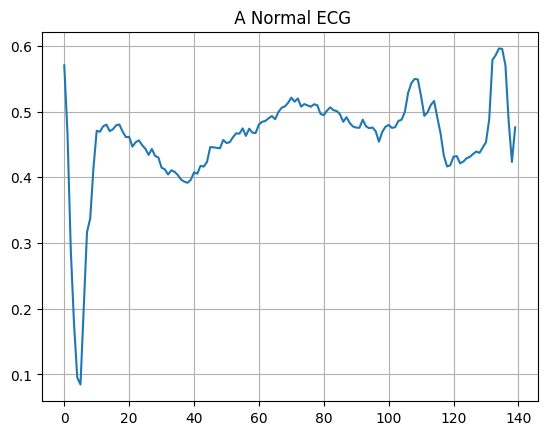

In [24]:
#first draw a free grid
plt.grid()
plt.plot(np.arange(140),normal_train_data[0])
#in x axis it brings the time steps from 0 to 140 and for each time step it brings the first attempt
plt.title(" A Normal ECG")
plt.show()

# Now plotting an Anomalous ECG (ANOMALY)

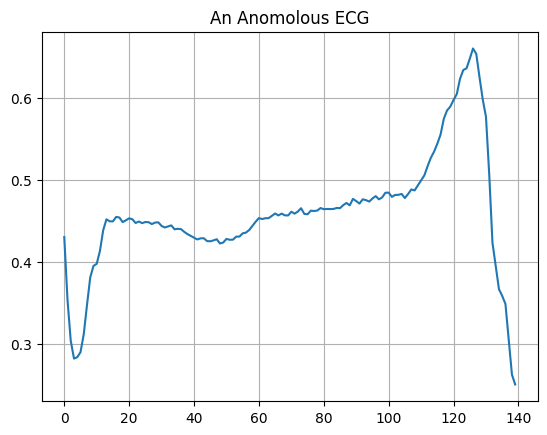

In [27]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomolous ECG")
plt.show()

# Build the model
a neural network model called AnomalyDetector in TensorFlow, which is built using the Keras API. This model is an autoencoder, which is commonly used for anomaly detection


In [28]:
class AnomalyDetector(Model):
    # a custom class AnomalyDetector that inherits from tf.keras.Model
    #keras model has training, evaluation and prediction
  def __init__(self):
      #calling the parent class(tf.keras.model) by super()
    super(AnomalyDetector, self).__init__()
    #defining the encoder which is a Sequential Model
    #it transforms the input data into a compressed represetentation
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"), #first layer has 32 neurons and ReLu is activated
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x) #first passes the input x through the encoder which compreses into lower-dimesntional
    decoded = self.decoder(encoded) #then passes the encoded to decoder to reconstruct the original input from the encoded data
    return decoded #returns the RECONSTRUCTED data

autoencoder = AnomalyDetector()

There are different optimizer. I can change it later to see if there is any difference

In [30]:
autoencoder.compile(optimizer='adam', loss='mae')
#The .compile() method is used to specify the configuration that the model will use during training. It defines the optimizer and loss function that will guide the training process.

#Optimizer: optimizer='adam':

# optimizer='adam' specifies that the Adam optimizer will be used to adjust the weights of the model during training.
# Adam (Adaptive Moment Estimation) is one of the most popular optimizers in deep learning. It combines the benefits of two other optimizers—Momentum
# and RMSProp—to provide efficient and adaptive learning rates.
# Adam is generally a good default optimizer because it adapts the learning rate during training based on the gradients, making it efficient for various types of deep learning models.

#loss = 'mae'
#mean absolut value for loss

In [31]:
history = autoencoder.fit(normal_train_data, normal_train_data, #trained on normal_train_data as input and target to reconstruct it
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data), #just like the traindata the input and target are the same
          shuffle=True) #shuffle = True ensures that the training data is shuffled each time to prevent the model from relying on the same data again and again

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0570 - val_loss: 0.0520
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0535 - val_loss: 0.0501
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0497 - val_loss: 0.0479
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0456 - val_loss: 0.0456
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0414 - val_loss: 0.0431
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0375 - val_loss: 0.0411
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0339 - val_loss: 0.0393
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0309 - val_loss: 0.0380
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0287 - val_loss: 0.0369
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0268 - val_loss: 0.0359
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0250 - val_loss: 0.0350
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0242 - val_loss: 0.0343
E

In [32]:
history.history['loss']           # Training loss for each epoch
history.history['val_loss']       # Validation loss for each epoch


[0.051998697221279144,
 0.05008069425821304,
 0.04793183505535126,
 0.0455886572599411,
 0.04312942177057266,
 0.04112115129828453,
 0.03934165835380554,
 0.038028545677661896,
 0.03685707226395607,
 0.03589672967791557,
 0.03501610457897186,
 0.0342884436249733,
 0.033757973462343216,
 0.03315741568803787,
 0.032648131251335144,
 0.03232533112168312,
 0.031967468559741974,
 0.03163687512278557,
 0.031495265662670135,
 0.031179549172520638]

# time to show it

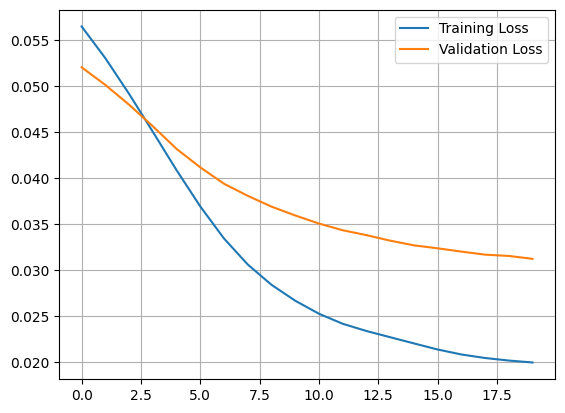

In [36]:
plt.grid()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.


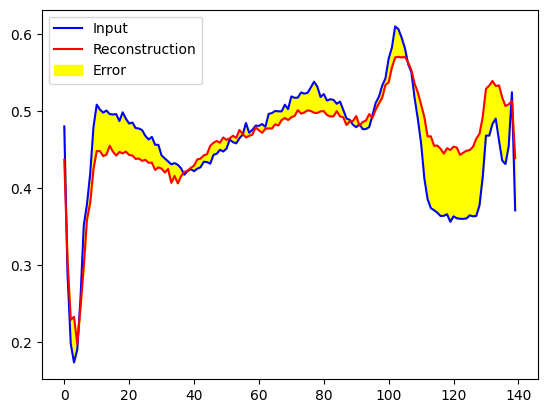

In [39]:
encoded_data = autoencoder.encoder(normal_test_data).numpy() #passes the normal data through the encoder
decoded_data = autoencoder.decoder(encoded_data).numpy() #passes the ENCODED_DATA to decoder which tries to reconstruct the original data
#.numpy() converts the Tensorflow sensors into Numpy arrays so they can be plotted
plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='yellow')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

# Detect Anomalies


First evaluating the reconstruction loss(errors) for each example in the training set after the autoencoder has processed it. then plotting the distribution of <br>errors (losses)to visualize how well the autoencoder performs on training data

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


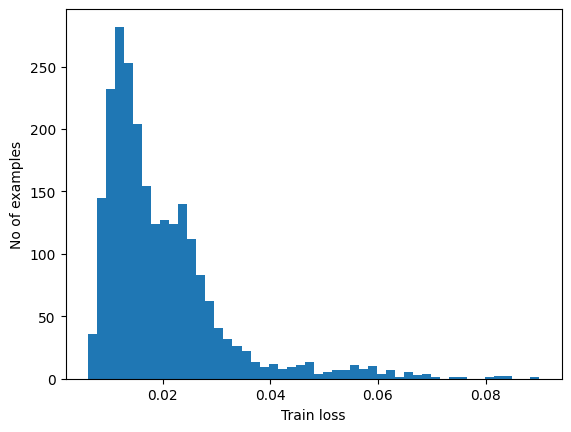

In [40]:
reconstructions = autoencoder.predict(normal_train_data) #passes the normal_train_data through the autoencoder>first encode the input
#>>the result reconstrcution contains the auto encoders RECONSTRUCTED version>> represent the model best attempt
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data) #calculates the mae between reconstruction and normal_train_data
#mae calculates the absolute difference between each point in original and reconstructed data
plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

# Interpreting the histogram
the Majority of the training examples have LOW reconstruction error
the rare values around 0.08 indicate that a small number of examples are harder for the autoencoder to reconstruct

In [42]:
#Choose a threshold value that is one standard deviations above the mea

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.030988842


# Evaluating reconstruction loss for the anomalous data

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


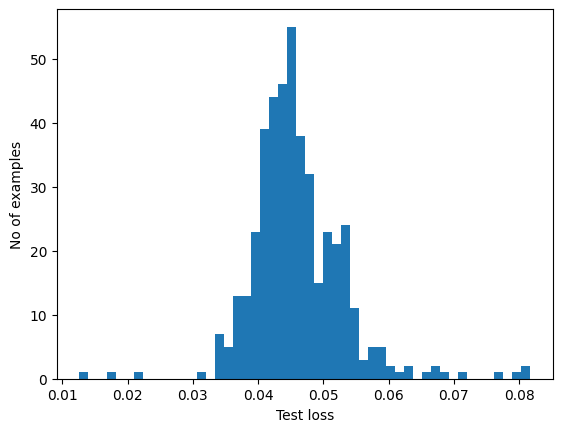

In [55]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data) #calculates the MAE between the original anomalous data and the reconstructed data

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

it shows that the autoencoder is STRUGGLING to reconstruct the anamolous data which was expected!!! The higher errors on anomalous data means the autoencoder ,trained on normal data, can not effectively compress and reconstruct patterns it hasnt learned! (Anomalous data)

In [47]:
threshold = 0.03
anomalies = test_loss > threshold

# reconstruction error more than 0.03 is going to classify as anomaly. we saw that the majority of reconstruction error in normal data was about 0.03 so more than that we can consider anomaly.

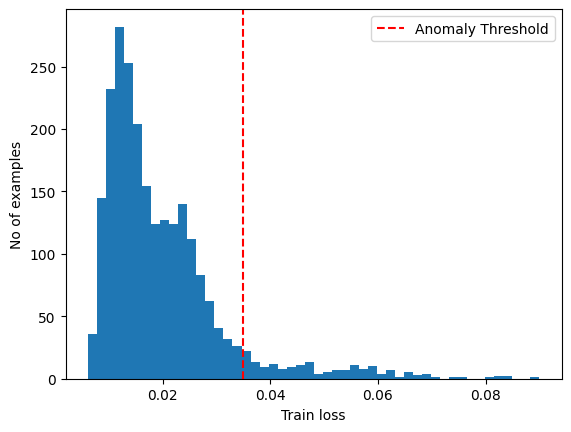

In [52]:
plt.hist(train_loss[None, :], bins=50)
plt.axvline(x=0.035, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.legend()
plt.show()

#in train loss it shows the threshold. All data less than threshold are classified as NORMAL data

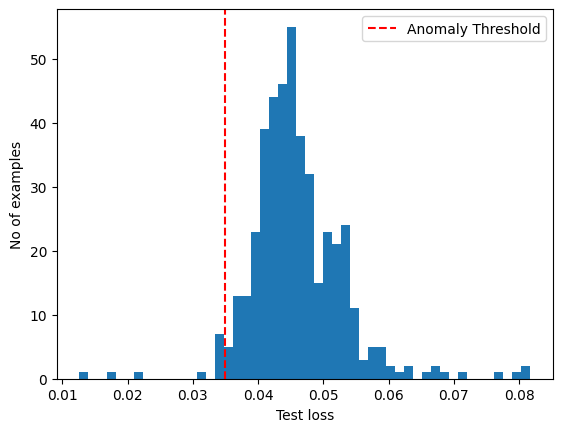

In [54]:
plt.hist(test_loss[None, :], bins=50)
plt.axvline(x=0.035, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.legend()
plt.show()

#in train loss it shows the threshold. All data more than threshold are classified as anomalous data


Diagrams show that for the train_loss which was the mae between normal_train_data and reconstruction data are lower and majority of them have lower train_loss.<br>
But in test_loss which is the MAE between ANOMALOUS data and reconstrcution the majority have higher loss

In [61]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels) 


Accuracy = 0.935
Precision = 0.9940119760479041
Recall = 0.8892857142857142
